### Visualizing one Coronavirus outcome

Colin Jemmott, March 3 2020

#### Overview

Goal is to visualize one possible COVID-19 outcome in the context of historical trends for the United States.

#### Warning!

I am a data scientist.  I don't know anything about how to model disease spread or mortality, so I made some super basic assumptions.  The goal was to help put possible outcomes in perspective, not to make an accurate model.

#### Approach

To do this I used historical mortality data from [The Human Mortality Database](https://www.mortality.org/) and estimates of coronavirus mortality from [Worldometer](https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/) with an assumed total infection rate (20% ffor plot shown).

The last year in the data was 2017, so I repeated that for 2018-2020, and added coronavirus to that, assuming linearity.

A 20% infection rate gives us similar overall mortality to 1993.  30% looks like Ventnam.  50% looks like WWII.

The visualization style was inspired by [this great plot](https://twitter.com/researchremora/status/1232734596548243457).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mortalityDf = pd.read_csv("no header.txt", sep='\s+')
mortalityDf = mortalityDf.drop(['Female','Male'], axis=1)
mortalityDf.head()

,Year,Age,Total
0,1933,0,0.061292
1,1933,1,0.009459
2,1933,2,0.004351
3,1933,3,0.003104
4,1933,4,0.002386


In [3]:
# Drop big ages, convert to int
def convertAge(ageStr):
    if len(ageStr) > 2:
        return None
    else:
        return int(ageStr)
    
mortalityDf['Age'] = mortalityDf['Age'].apply(convertAge)
mortalityDf = mortalityDf[~mortalityDf['Age'].isna()]
mortalityDf = mortalityDf.reset_index(drop=True)
mortalityDf

,Year,Age,Total
0,1933,0.0,0.061292
1,1933,1.0,0.009459
2,1933,2.0,0.004351
3,1933,3.0,0.003104
4,1933,4.0,0.002386
...,...,...,...
8495,2017,95.0,0.235980
8496,2017,96.0,0.256795
8497,2017,97.0,0.291399
8498,2017,98.0,0.308867


In [4]:
def addCorona(age, infectionRate):
    if age >= 80:
        m = .148
    elif age >= 70:
        m = 0.08
    elif age >= 60:
        m = 0.036
    elif age >= 50:
        m = 0.013
    elif age >= 40:
        m = 0.004
    elif age >= 10:
        m = 0.002
    else:
        m = 0
    return m*infectionRate

In [5]:
infectionRate = 0.2

latest = mortalityDf[mortalityDf['Year'] == 2017]

# Assume 2018 and 2019 look like 2017
for index, row in latest.iterrows():
    mortalityDf.loc[len(mortalityDf)] = [2018,row['Age'],row['Total']]
for index, row in latest.iterrows():
    mortalityDf.loc[len(mortalityDf)] = [2019,row['Age'],row['Total']]


for index, row in latest.iterrows():
    mortality = row['Total'] + addCorona(row['Age'], infectionRate)
    mortalityDf.loc[len(mortalityDf)] = [2020,row['Age'],mortality]
mortalityDf

,Year,Age,Total
0,1933.0,0.0,0.061292
1,1933.0,1.0,0.009459
2,1933.0,2.0,0.004351
3,1933.0,3.0,0.003104
4,1933.0,4.0,0.002386
...,...,...,...
8795,2020.0,95.0,0.265580
8796,2020.0,96.0,0.286395
8797,2020.0,97.0,0.320999
8798,2020.0,98.0,0.338467


In [6]:
mortalityDf['Age'] = mortalityDf['Age'].astype(int)
mortalityDf['Year'] = mortalityDf['Year'].astype(int)

In [7]:
# Convert to percentiles
mortalityDf['Percentile'] = mortalityDf['Total'].rank(pct=True)*10
mortalityDf['Percentile'] = mortalityDf['Percentile'].apply(round)*10

# Pivot to 2-D
df = mortalityDf.pivot(index='Age', columns='Year', values='Percentile')

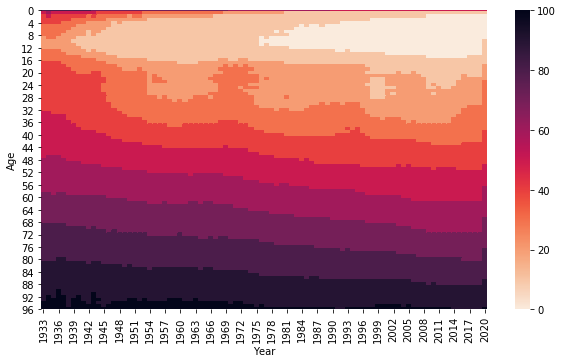

In [8]:
# plot
plt.rcParams["figure.figsize"] = 10,5.5
sns.heatmap(df,cmap=sns.cm.rocket_r)